In [1]:
import torch
import numpy as np
from torch.autograd import Variable

torch.manual_seed(2017)



In [2]:
# 读入数据 x 和 y
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

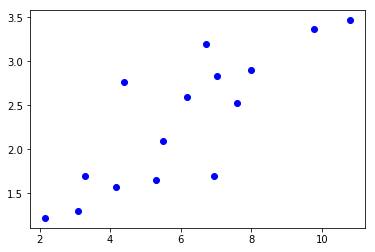

In [3]:
# 画出图像
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x_train, y_train, 'bo')

In [4]:
# 转换成 Tensor
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)

# 定义参数 w 和 b
w = Variable(torch.randn(1), requires_grad=True) # 随机初始化
b = Variable(torch.zeros(1), requires_grad=True) # 使用 0 进行初始化

In [5]:
# 构建线性回归模型
x_train = Variable(x_train)
y_train = Variable(y_train)

def linear_model(x):
    return x * w + b

In [6]:
y_ = linear_model(x_train)

In [7]:
# 计算误差
def get_loss(y_, y):
    return torch.mean((y_ - y_train) ** 2)

loss = get_loss(y_, y_train)

In [8]:


# 打印一下看看 loss 的大小
print(loss)



tensor(153.3520, grad_fn=<MeanBackward1>)


In [9]:


# 自动求导
loss.backward()



In [10]:
# 查看 w 和 b 的梯度
print(w.grad)
print(b.grad)

tensor([161.0043])
tensor([22.8730])


In [11]:


# 更新一次参数
w.data = w.data - 1e-2 * w.grad.data
b.data = b.data - 1e-2 * b.grad.data



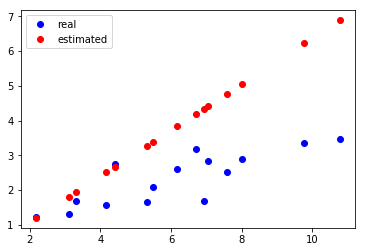

In [12]:
y_ = linear_model(x_train)
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'bo', label='real')
plt.plot(x_train.data.numpy(), y_.data.numpy(), 'ro', label='estimated')
plt.legend()

In [13]:
for e in range(50): # 进行 50 次更新
    y_ = linear_model(x_train)
    loss = get_loss(y_, y_train)
    
    w.grad.zero_() # 记得归零梯度
    b.grad.zero_() # 记得归零梯度
    loss.backward()
    
    w.data = w.data - 1e-3 * w.grad.data # 更新 w
    b.data = b.data - 1e-3 * b.grad.data # 更新 b 
    print('epoch: {}, loss: {}'.format(e, loss.data[0]))

epoch: 0, loss: 3.135772228240967
epoch: 1, loss: 2.6674253940582275
epoch: 2, loss: 2.276499032974243
epoch: 3, loss: 1.9501922130584717
epoch: 4, loss: 1.677822232246399
epoch: 5, loss: 1.450471043586731
epoch: 6, loss: 1.2606958150863647
epoch: 7, loss: 1.1022840738296509
epoch: 8, loss: 0.9700514078140259
epoch: 9, loss: 0.8596690893173218
epoch: 10, loss: 0.7675243020057678
epoch: 11, loss: 0.6906023621559143
epoch: 12, loss: 0.6263866424560547
epoch: 13, loss: 0.5727759599685669
epoch: 14, loss: 0.5280174612998962
epoch: 15, loss: 0.49064749479293823
epoch: 16, loss: 0.45944443345069885
epoch: 17, loss: 0.4333888590335846
epoch: 18, loss: 0.41162970662117004
epoch: 19, loss: 0.3934566378593445
epoch: 20, loss: 0.3782770037651062
epoch: 21, loss: 0.36559566855430603
epoch: 22, loss: 0.3549995422363281
epoch: 23, loss: 0.3461441099643707
epoch: 24, loss: 0.3387413024902344
epoch: 25, loss: 0.3325512111186981
epoch: 26, loss: 0.32737332582473755
epoch: 27, loss: 0.32304033637046814


C:\Users\tt\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  # This is added back by InteractiveShellApp.init_path()


In [14]:
for e in range(50): # 进行 10 次更新
    y_ = linear_model(x_train)
    loss = get_loss(y_, y_train)
    
    w.grad.zero_() # 记得归零梯度
    b.grad.zero_() # 记得归零梯度
    loss.backward()
    
    w.data = w.data - 1e-1 * w.grad.data # 更新 w
    b.data = b.data - 1e-1 * b.grad.data # 更新 b 
    print('epoch: {}, loss: {}'.format(e, loss.data[0]))

epoch: 0, loss: 0.3002880811691284
epoch: 1, loss: 0.3129896819591522
epoch: 2, loss: 1.4357647895812988
epoch: 3, loss: 67.32707977294922
epoch: 4, loss: 3913.325927734375
epoch: 5, loss: 228380.015625
epoch: 6, loss: 13329059.0
epoch: 7, loss: 777931648.0
epoch: 8, loss: 45402894336.0
epoch: 9, loss: 2649875808256.0
epoch: 10, loss: 154656252624896.0
epoch: 11, loss: 9026296826822656.0
epoch: 12, loss: 5.268071851501814e+17
epoch: 13, loss: 3.0746356131035087e+19
epoch: 14, loss: 1.7944678565125638e+21
epoch: 15, loss: 1.0473163267286586e+23
epoch: 16, loss: 6.112515998568159e+24
epoch: 17, loss: 3.5674844583026444e+26
epoch: 18, loss: 2.082111924591427e+28
epoch: 19, loss: 1.2151953089151506e+30
epoch: 20, loss: 7.092317579703805e+31
epoch: 21, loss: 4.139331676829528e+33
epoch: 22, loss: 2.415862566691736e+35
epoch: 23, loss: 1.4099844378628154e+37
epoch: 24, loss: inf
epoch: 25, loss: inf
epoch: 26, loss: inf
epoch: 27, loss: inf
epoch: 28, loss: inf
epoch: 29, loss: inf
epoch: 30

C:\Users\tt\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  # This is added back by InteractiveShellApp.init_path()


In [15]:
for e in range(10): # 进行 10 次更新
    y_ = linear_model(x_train)
    loss = get_loss(y_, y_train)
    
    w.grad.zero_() # 记得归零梯度
    b.grad.zero_() # 记得归零梯度
    loss.backward()
    
    w.data = w.data - 1e-2.5 * w.grad.data # 更新 w
    b.data = b.data - 1e-2.5 * b.grad.data # 更新 b 
    print('epoch: {}, loss: {}'.format(e, loss.data[0]))

SyntaxError: invalid syntax (<ipython-input-15-cf3203d8de1a>, line 9)

In [16]:
for e in range(10): # 进行 10 次更新
    y_ = linear_model(x_train)
    loss = get_loss(y_, y_train)
    
    w.grad.zero_() # 记得归零梯度
    b.grad.zero_() # 记得归零梯度
    loss.backward()
    
    w.data = w.data - 1e-4 * w.grad.data # 更新 w
    b.data = b.data - 1e-4 * b.grad.data # 更新 b 
    print('epoch: {}, loss: {}'.format(e, loss.data[0]))

epoch: 0, loss: nan
epoch: 1, loss: nan
epoch: 2, loss: nan
epoch: 3, loss: nan
epoch: 4, loss: nan
epoch: 5, loss: nan
epoch: 6, loss: nan
epoch: 7, loss: nan
epoch: 8, loss: nan
epoch: 9, loss: nan


C:\Users\tt\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  # This is added back by InteractiveShellApp.init_path()


In [17]:
for e in range(50): # 进行 10 次更新
    y_ = linear_model(x_train)
    loss = get_loss(y_, y_train)
    
    w.grad.zero_() # 记得归零梯度
    b.grad.zero_() # 记得归零梯度
    loss.backward()
    
    w.data = w.data - 1e-2 * w.grad.data # 更新 w
    b.data = b.data - 1e-2 * b.grad.data # 更新 b 
    print('epoch: {}, loss: {}'.format(e, loss.data[0]))

epoch: 0, loss: nan
epoch: 1, loss: nan
epoch: 2, loss: nan
epoch: 3, loss: nan
epoch: 4, loss: nan
epoch: 5, loss: nan
epoch: 6, loss: nan
epoch: 7, loss: nan
epoch: 8, loss: nan
epoch: 9, loss: nan
epoch: 10, loss: nan
epoch: 11, loss: nan
epoch: 12, loss: nan
epoch: 13, loss: nan
epoch: 14, loss: nan
epoch: 15, loss: nan
epoch: 16, loss: nan
epoch: 17, loss: nan
epoch: 18, loss: nan
epoch: 19, loss: nan
epoch: 20, loss: nan
epoch: 21, loss: nan
epoch: 22, loss: nan
epoch: 23, loss: nan
epoch: 24, loss: nan
epoch: 25, loss: nan
epoch: 26, loss: nan
epoch: 27, loss: nan
epoch: 28, loss: nan
epoch: 29, loss: nan
epoch: 30, loss: nan
epoch: 31, loss: nan
epoch: 32, loss: nan
epoch: 33, loss: nan
epoch: 34, loss: nan
epoch: 35, loss: nan
epoch: 36, loss: nan
epoch: 37, loss: nan
epoch: 38, loss: nan
epoch: 39, loss: nan
epoch: 40, loss: nan
epoch: 41, loss: nan
epoch: 42, loss: nan
epoch: 43, loss: nan
epoch: 44, loss: nan
epoch: 45, loss: nan
epoch: 46, loss: nan
epoch: 47, loss: nan
ep

C:\Users\tt\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  # This is added back by InteractiveShellApp.init_path()


In [18]:
for e in range(10): # 进行 10 次更新
    y_ = linear_model(x_train)
    loss = get_loss(y_, y_train)
    
    w.grad.zero_() # 记得归零梯度
    b.grad.zero_() # 记得归零梯度
    loss.backward()
    
    w.data = w.data - 1e-2 * w.grad.data # 更新 w
    b.data = b.data - 1e-2 * b.grad.data # 更新 b 
    print('epoch: {}, loss: {}'.format(e, loss.data[0]))

epoch: 0, loss: nan
epoch: 1, loss: nan
epoch: 2, loss: nan
epoch: 3, loss: nan
epoch: 4, loss: nan
epoch: 5, loss: nan
epoch: 6, loss: nan
epoch: 7, loss: nan
epoch: 8, loss: nan
epoch: 9, loss: nan


C:\Users\tt\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  # This is added back by InteractiveShellApp.init_path()
